In [1]:
#%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")


In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)



In [10]:
Measurement.__table__

Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None)

In [11]:
Station.__table__

Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)

In [12]:
#CAN PROBABLY DELETE THIS SECTION, SIMPLY INSPECTING THE DATA

inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
    

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
#CAN PROBABLY DELETE THIS SECTION, SIMPLY INSPECTING THE DATA
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [14]:
#CAN PROBABLY DELETE THIS SECTION, SIMPLY INSPECTING THE DATA
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

# Exploratory Climate Analysis

In [15]:
# Create a session
session = Session(engine)

first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x10ddb1240>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [16]:

# Design a query to retrieve the last 12 months of precipitation data and plot the results
#FINDING MOST RECENT DATE
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates

('2017-08-23')

In [17]:
#EARLIEST DATE TO GET IDEA OF RANGE OF THE DATA 
#NOT NEEDED
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [18]:
#the date range from the most recent year's worth of data
#Select only the date and prcp values.

#query_date = dt.date(2011, 4, 8) - dt.timedelta(days=7)
#print("Query Date: ", query_date)

#session.query(Dow.date, Dow.close_price).\
#    filter(Dow.stock == 'CSCO').\
#    filter(Dow.date == query_date).all()

##################################################
data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date, Measurement.prcp).all()

#print(data)

df = pd.DataFrame(data) #(query.statement, query.session.bind)
df.head()

df.sort_values('date')

#df.sort_values('2')
##################################################
#session.query(Measurement.prcp).\
 #   filter(Measurement.prcp).\

,date,prcp
0,2016-08-23,NaN
1,2016-08-23,0.00
2,2016-08-23,0.02
3,2016-08-23,0.05
4,2016-08-23,0.15
5,2016-08-23,0.70
6,2016-08-23,1.79
13,2016-08-24,2.28
12,2016-08-24,2.15
11,2016-08-24,2.15


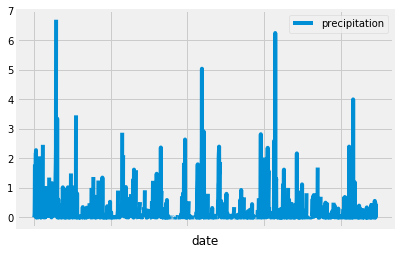

In [19]:
ax = df.plot(x = 'date', y = 'prcp')#, style = )
ax.legend(["precipitation"], loc = "upper right")


In [20]:
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [27]:
###CAN BE DELETED.   INFORMATION ON Station 

first_row = session.query(Station).first()
first_row.__dict__

#first_row = session.query(Measurement).first()
#first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11947cba8>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0}

In [22]:
#station_data = session.query(Station.id, Station.name)
#print(station_data)

#df = pd.DataFrame(Station) #(query.statement, query.session.bind)
#df.head()

#count number of stations
session.query(func.count(Station.name)).all()

#show a list of all stations and their name:
#session.query((Station.name)).all()

[(9)]

In [58]:
#LIST STATIONS IN DESCENDING ORDER BY OBSERVATION COUNT           
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [53]:
#show the most active station: 

most_observations = active_stations[0][0]  

print(f"Station #{most_observations} had the most observations")
#MODEL: session.query(func.max(Table.column))


Station #USC00519281 had the most observations


In [66]:
#retrieve most recent 12 months of temperature observation data
tobs_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= '2016-08-23', Measurement.station == most_observations).\
    order_by(Measurement.date, Measurement.tobs).all()

#print(data)

df2 = pd.DataFrame(tobs_data) #(query.statement, query.session.bind)
df2.head()

df2.sort_values('date')

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
5,2016-08-28,73.0
6,2016-08-29,78.0
7,2016-08-30,77.0
8,2016-08-31,78.0
9,2016-09-01,80.0


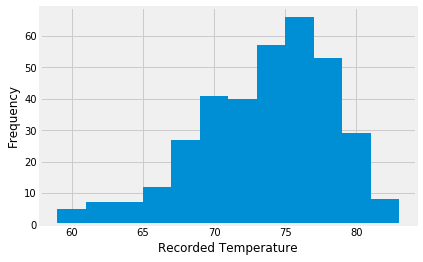

In [75]:
#plot results as histogram with 12 bins 
plt.hist(df2['tobs'],12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Frequency")
plt.show()